[View in Colaboratory](https://colab.research.google.com/github/neoaksa/tensorflowDemo/blob/master/Tensorflow_Princples.ipynb)



-   Basic Concepts
-  [Natural Language](#NLP)
    - Bagging words
    - TF-IDF
    - word2vec
    - doc2vec



In [7]:
# basic concepts of tf
import tensorflow as tf
# import tensorflow.nn as nn
def custom_polynomial(value):
  return(tf.subtract(3 * tf.square(value), value) + 10) 
with tf.Session() as sess:
  print(sess.run(custom_polynomial(11)))
  print(sess.run(tf.nn.relu(custom_polynomial(11))))

362
362


#### without upper cap
softplus [0, ++]
Relu [0,++]
ReLU6[0,6]
ExpLU[-1, ++] # similar to ReLU+

### with cap
sigmoid [0,1]
Tanh[-1,1]
softsign [-1,1]


In [23]:
# placeholder demo
import numpy as np
import tensorflow as tf
x_arry = np.array([1,4,5,6])
x_data = tf.placeholder(tf.float32)
m_const = tf.constant(3.)
m_product = tf.multiply(x_data,m_const)
for x in x_arry:
    with tf.Session() as sess:
        print(sess.run(m_product, feed_dict={x_data:x}))
    

3.0
12.0
15.0
18.0


In [26]:
my_array = np.array([[1., 3., 5., 7., 9.], [-2., 0., 2., 4., 6.], [-6., -3., 0., 3., 6.]])
x_vals = np.array([my_array, my_array + 1])
x_data = tf.placeholder(tf.float32, shape=(3, None))

m1 = tf.constant([[1.],[0.],[-1.],[2.],[4.]]) 
m2 = tf.constant([[2.]]) 
a1 = tf.constant([[10.]])

prod1 = tf.matmul(x_data, m1) 
prod2 = tf.matmul(prod1, m2) 
add1 = tf.add(prod2, a1)

for x_val in x_vals:
    with tf.Session() as sess:
        print(sess.run(add1, feed_dict={x_data: x_val}))

[[102.]
 [ 66.]
 [ 58.]]
[[114.]
 [ 78.]
 [ 70.]]


### Type of loss function
1. regression
#### L2 norm loss
tf.square(target - x_vals)
#### L1 norm loss
tf.abs(target - x_vals)
#### Pseudo-huber loss
tf.mul(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_vals)/delta1)) - 1.)

2. classification
#### classification loss
#### Hinge loss: two classes[1,-1]
=tf.maximum(0., 1. - tf.mul(target, x_vals))
#### Corss entorpy
tf.mul(target, tf.log(x_vals)) - tf.mul((1. - target), tf.log(1. - x_vals))
xentropy_y_out
#### sigmod loss
tf.nn.sigmoid_cross_entropy_with_ logits(x_vals, targets)
#### weight corss entorpy
= tf.nn.weighted_cross_entropy_with_ logits(x_vals, targets, weight)
#### softmax corss-entropy
tf.nn.softmax_cross_entropy_with_ logits(unscaled_logits, target_dist)
#### sparse softmax cross-entropy
tf.nn.sparse_softmax_cross_entropy_with_ logits(unscaled_logits, sparse_target_dist)

### Model metric
1. $R^2$: linear model
2. RMSE:Regression model
3. Confusion matrix: catgorial model
4. Recall: catgorial model
5. precision: categorical model
6. F-score: categorial model

#### the basic processes 
1. create the data or prepare the data
2. initialize placeholder and variables
3. creat   a loss function
4. defined an optimization algo
5. iterate and update

Step #25and A=[[4.143956]]
Step #50and A=[[6.4399414]]
Step #75and A=[[7.7984047]]
Step #100and A=[[8.588286]]
Step #125and A=[[9.047281]]
Step #150and A=[[9.320514]]
Step #175and A=[[9.546187]]
Step #200and A=[[9.625418]]
Step #225and A=[[9.654477]]
Step #250and A=[[9.720761]]
Step #275and A=[[9.720877]]
Step #300and A=[[9.750059]]


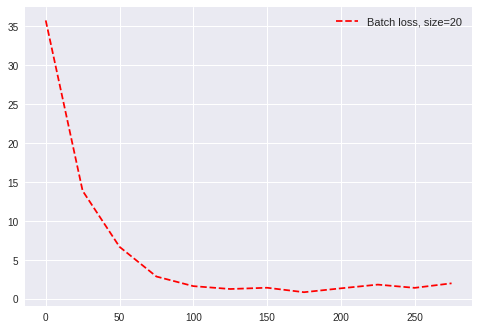

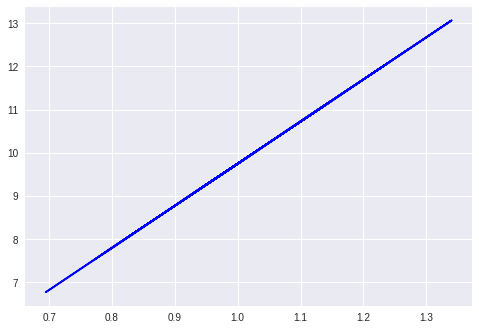

In [37]:
# this is a demo
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# general traning data
x_vals = np.random.normal(1,0.1,100)
y_vals = np.repeat(10.,100)
# batch size
batch_size = 20
# input and output
x = tf.placeholder(shape=[None,1], dtype=tf.float32)
y = tf.placeholder(shape=[None,1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
# formular
output = tf.matmul(x,A)
# loss function: mean of L2 loss function
loss = tf.reduce_mean(tf.square(output - y))
# training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # optimaztr
    # another opt: MoentumOPtimizer & AdagradOptimizer
    opt = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    training = opt.minimize(loss)
    # batch loss for recording loss and plot it
    batch_loss = []
    for i in range(300):
        rand_index = np.random.choice(100, size=batch_size)
        # transfer to 25*1
        rand_x = np.transpose([x_vals[rand_index]])
        rand_y = np.transpose([y_vals[rand_index]])
        sess.run(training, feed_dict={x:rand_x,y:rand_y})
        if(i+1)%25==0:
            print('Step #'+str(i+1)+'and A='+str(sess.run(A)))
            temp_loss = sess.run(loss,feed_dict={x:rand_x,y:rand_y})
            batch_loss.append(temp_loss)
    # plot loss
    plt.plot(range(0,300,25),batch_loss,'r--',label='Batch loss, size=20')
    plt.legend(loc='upper right',prop={'size':11})
    plt.show()
    # plot function
    [[slope]] = sess.run(A)
    linevalue = []
    for i in x_vals:
        linevalue.append(slope * i)
    plt.plot(x_vals,linevalue,'b-')
    plt.show()


<b id="NLP">Natural Language Processing</b>

content:
1. bag of words
2. TF-IDF
3. skip-gram and CBOW
4. word2vec
5. Doc2vec

#### Bag of words processes:
1. lemmatize dataset
2. embedding words
3. one-hot vector through identity matrix.(alternative way is using loop search)
4. build model. Here we use linear regression
5. evaluation the model

this is a example for "i me too":[2, 10, 126, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Training Observation #1000: Loss = 5.470682
Training Observation #2000: Loss = 6.279176e-05
Training Observation #3000: Loss = 2.1354768
Test Observation #1000

Overall Test Accuracy: 0.7766304347826087


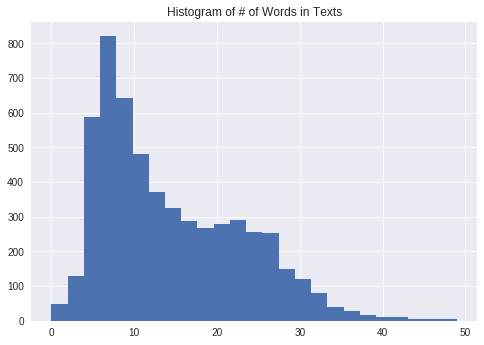

In [16]:
# Bag of words
import tensorflow as tf 
import matplotlib.pyplot as plt 
import os
import numpy as np 
import csv 
import string 
import requests 
import io
from zipfile import ZipFile 
from tensorflow.contrib import learn
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

#-----prepare the data through URL
save_file_name = os.path.join('','temp_spam_data.csv')
# file existing
if os.path.isfile(save_file_name): 
    text_data = []
    with open(save_file_name, 'r') as temp_output_file: 
        reader = csv.reader(temp_output_file) 
        for row in reader:
            text_data.append(row)
# file not existing
else:
    zip_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
    # http request 
    r = requests.get(zip_url) 
    # transfer to zip object
    z = ZipFile(io.BytesIO(r.content))
    # unzip zip object
    file = z.read('SMSSpamCollection') 
    # Format Data
    text_data = file.decode()
    text_data = text_data.encode('ascii',errors='ignore') 
    text_data = text_data.decode().split('\n') 
    text_data = [x.split('\t') for x in text_data if len(x)>=1]
    # And write to csv
    with open(save_file_name, 'w') as temp_output_file: 
        writer = csv.writer(temp_output_file) 
        writer.writerows(text_data) 
texts = [x[1] for x in text_data] 
target = [x[0] for x in text_data] 
# Relabel 'spam' as 1, 'ham' as 0
target = [1 if x=='spam' else 0 for x in target]

#-----preprocessing the texts
# Convert to lower case
texts = [x.lower() for x in texts] # Remove punctuation
texts = [''.join(c for c in x if c not in string.punctuation) for x in texts]
# Remove numbers
texts = [''.join(c for c in x if c not in '0123456789') for x in texts]
# Trim extra whitespace 
texts = [' '.join(x.split()) for x in texts]
# Plot histogram of text lengths 
text_lengths = [len(x.split()) for x in texts]    
text_lengths = [x for x in text_lengths if x < 50] 
plt.hist(text_lengths, bins=25)
plt.title('Histogram of # of Words in Texts') 

#-----embedding words by vocab_processor
sentence_size = 25 
min_word_freq = 3
vocab_processor = learn.preprocessing.VocabularyProcessor(sentence_size, min_frequency=min_word_freq) 
vocab_processor.fit_transform(texts) 
embedding_size = len(vocab_processor.vocabulary_)
# an example , you can beg any sentence into a vector
print('this is a example for "i me too":'+ str(next(vocab_processor.transform(['i me too'])).tolist()))

#------split dataset into traning and testing
texts_train,texts_test,target_train,target_test = train_test_split(texts, target, test_size=0.33, random_state=42)

#------traning
# identiy matrix
identity_mat = tf.diag(tf.ones(shape=[embedding_size]))
# print(tf.Session().run(identity_mat))
# logistic regression
A = tf.Variable(tf.random_normal(shape=[embedding_size,1])) 
b = tf.Variable(tf.random_normal(shape=[1,1])) 
# Initialize placeholders
x_data = tf.placeholder(shape=[sentence_size], dtype=tf.int32) 
y_target = tf.placeholder(shape=[1, 1], dtype=tf.float32)

#-----embedding lookup will transfer to one hot vector
# pick up index of each word from identity matrix
x_embed = tf.nn.embedding_lookup(identity_mat, x_data)
# combine to a vector of a sentence
x_col_sums = tf.reduce_sum(x_embed, 0)
# since A is shape [n,1], we need to expend input to [1,n]
x_col_sums_2D = tf.expand_dims(x_col_sums, 0) 
model_output = tf.add(tf.matmul(x_col_sums_2D, A), b)
# loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=y_target))
# Prediction operation
prediction = tf.sigmoid(model_output) 
# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.001) 
train_step = my_opt.minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loss_vec = [] 
    train_acc_all = [] 
    train_acc_avg = []
    for ix, t in enumerate(vocab_processor.fit_transform(texts_train)):
        y_data = [[target_train[ix]]]
        sess.run(train_step, feed_dict={x_data: t, y_target: y_data})
        temp_loss = sess.run(loss, feed_dict={x_data: t, y_target: y_data})
        loss_vec.append(temp_loss)
        if (ix+1)%1000==0:
            print('Training Observation #' + str(ix+1) + ': Loss = ' + str(temp_loss))
        # Keep trailing average of past 50 observations accuracy # Get prediction of single observation
        [[temp_pred]] = sess.run(prediction, feed_dict={x_data:t, y_target:y_data})
        # Get True/False if prediction is accurate 
        train_acc_temp = target_train[ix]==np.round(temp_pred) 
        train_acc_all.append(train_acc_temp) 
        if len(train_acc_all) >= 50:
            train_acc_avg.append(np.mean(train_acc_all[-50:]))
    # evaluation
    test_acc_all = []
    for ix, t in enumerate(vocab_processor.fit_transform(texts_test)): 
        y_data = [[target_test[ix]]]
        if (ix+1)%1000==0: 
            print('Test Observation #' + str(ix+1))
        # Keep trailing average of past 50 observations accuracy
        # Get prediction of single observation
        [[temp_pred]] = sess.run(prediction, feed_dict={x_data:t, y_target:y_data})
        # Get True/False if prediction is accurate 
        test_acc_temp = target_test[ix]==np.round(temp_pred) 
        test_acc_all.append(test_acc_temp)
    print('\nOverall Test Accuracy: {}'.format(np.mean(test_acc_all))) 

tokenlize can be aslo done by NLTK:

```python
words = word_tokenize(content)
words = [lemmatizer.lemmatize(i) for i in words]
lexicon = list(set(lexicon + words))
```



#### TF-IDF
$w_{tf-idf} = w_{tf}\cdot log(\frac{1}{w_{df}}) $

$w_{tf}$ is the word freq by document, $w_{df}$ is the total freq of such words across all documents.
We can deduce that if a word exists in all documents, log(1/x) will close to 0. But if a word with high freq in a document and low freq in others, it should be important. 

In [0]:
# TF-IDF
# in order to get dataset "texts", 
# we need to run previous snippet(bagging words) first
import tensorflow as tf import matplotlib.pyplot as plt 
import csv
import numpy as np 
import os
import string 
import requests 
import io 
import nltk
from zipfile import ZipFile 
from sklearn.feature_extraction.text 
import TfidfVectorizer
from sklearn.model_selection import train_test_split

# contants
batch_size = 200
max_features = 1000
# tokenize
def tokenizer(text):
    words = nltk.word_tokenizer(text)
    return words
# TF-IDF of texts
tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words='english', max_features=max_features)
sparse_tfidf_texts = tfidf.fit_transform(texts) 
#------split dataset into traning and testing
texts_train,texts_test,target_train,target_test = train_test_split(texts, target, test_size=0.33, random_state=42)
#-----model structure
A = tf.Variable(tf.random_normal(shape=[max_features,1])) 
b = tf.Variable(tf.random_normal(shape=[1,1])) 
# Initialize placeholders
x_data = tf.placeholder(shape=[None, max_features], dtype=tf. float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
model_output = tf.add(tf.matmul(x_data, A), b)
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(model_output, y_target)
prediction = tf.round(tf.sigmoid(model_output))
predictions_correct = tf.cast(tf.equal(prediction, y_target), tf.float32)
accuracy = tf.reduce_mean(predictions_correct)
my_opt = tf.train.GradientDescentOptimizer(0.0025) 
train_step = my_opt.minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())